# Author: Hitesh Malhotra 

---------------------

-----------------

-----------------------------

## Import packages and modules

In [1]:
# arrays
import numpy as np


# data frames
import pandas as pd


# Visualisation.
import matplotlib.pyplot as plt


# It hepls to find patterns in paths of files. 
import glob

# For dealing with audio files.
import librosa as lr

--------

-------------------

## Function that inputs 'path of audio file' and outputs 'AUDIO:str' 
Path should be .wav format file only.

In [9]:
def audio_id_generation(path):
    
    audio_file = glob.glob(path)
    
    # Reading our audio file.
    audio , sfreq = lr.load(audio_file[0])
    time = np.arange(0,len(audio))/sfreq

    start = 0
    stop = len(audio)/20 -1


    # array storing root mean square values of all segments.
    rms = np.zeros(20)



    for i in range(0,20):

    #     Segmented time and audio.
        updated_time = time[int(start):int(stop)]
        updated_audio = audio[int(start):int(stop)]


    #      Appending RMS value.

        square = np.square(updated_audio)
        mean = np.mean(square)
        root = np.sqrt(mean)

        rms[i] = root

        #     Plotting.
        fig, ax = plt.subplots()
        ax.plot(updated_time,updated_audio)
        ax.set(xlabel = "Time (s)" , ylabel = "Sound Amplitude")
        plt.show()

    #     Modifying start stop values.
        start = stop + 1
        stop = (len(audio)/20)*(i+2) - 1
        
        
       
    
    
    
    result = rms*100

    # Corrosponding ASCII value for each segment.
    result = result%36 + 65 

    result = result.astype(int)

    for i in range(0,len(result)):
        if result[i] > 90:
            result[i] = 47 + (result[i] - 90) 

    print("ASCII Values: ")
    print(result)

    string = ""
    for value in result:
        string = string + chr(value)

    print("AUDIO ID : ",str(string))

    

-------------

---------------

## Few samples for testing.

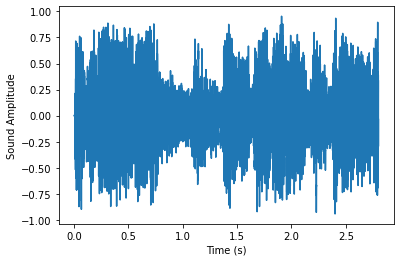

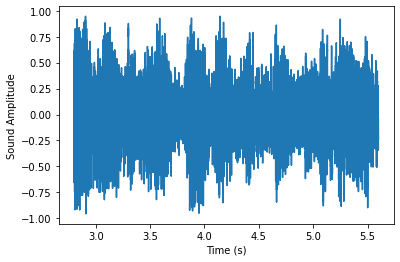

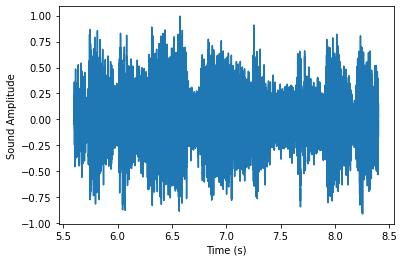

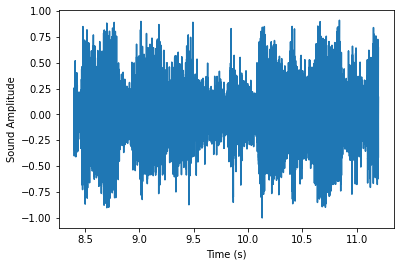

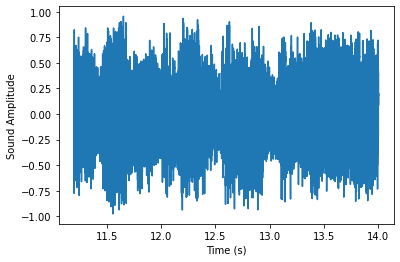

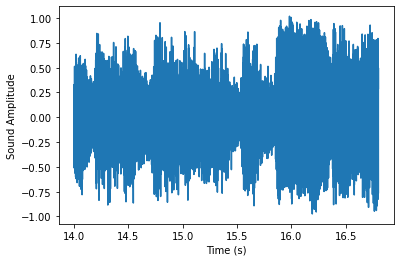

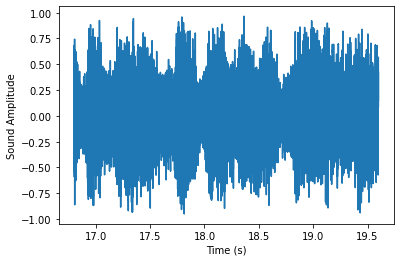

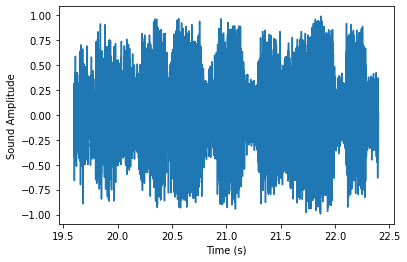

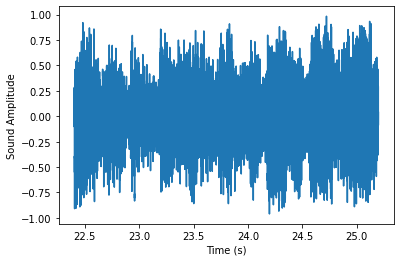

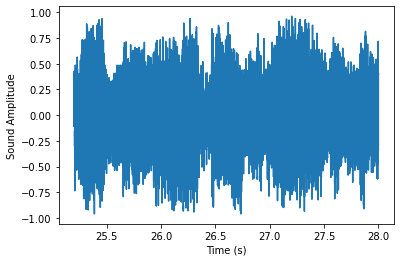

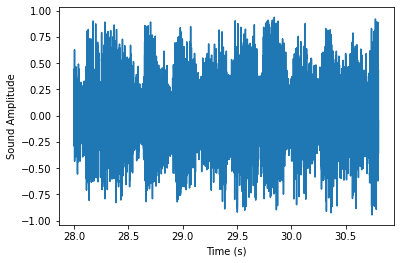

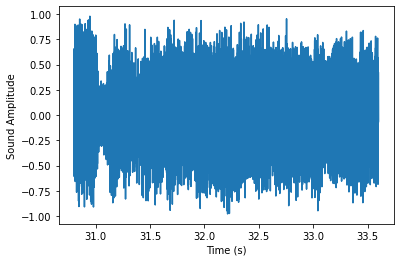

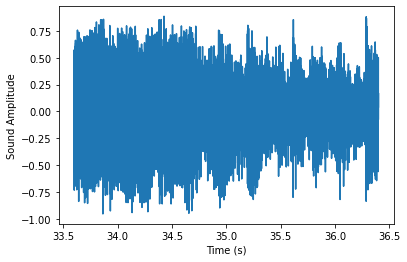

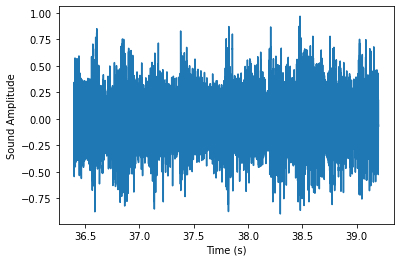

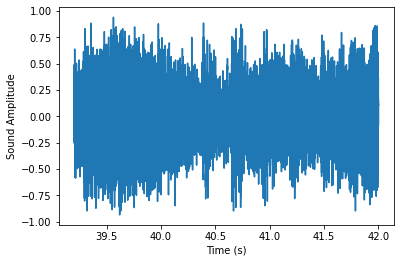

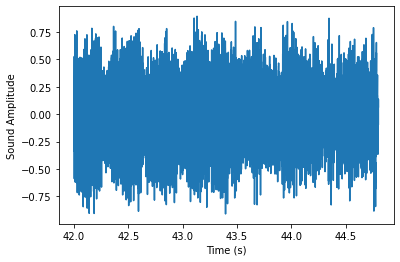

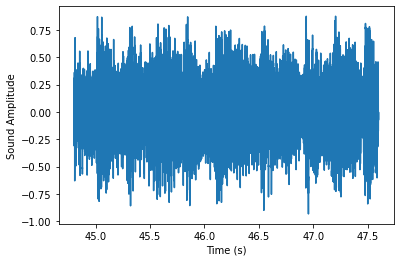

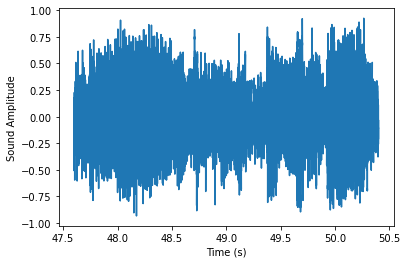

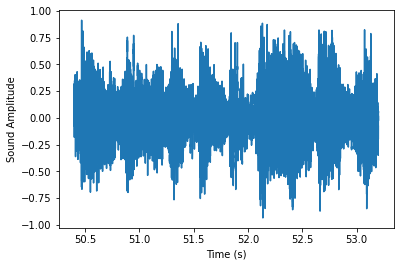

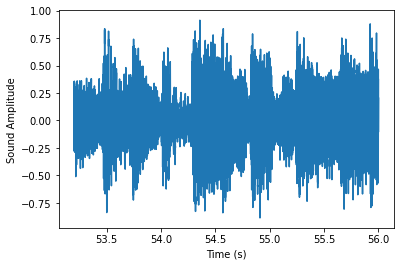

ASCII Values: 
[89 90 87 89 49 49 50 50 48 50 49 50 48 87 90 90 88 90 85 86]
AUDIO ID :  YZWY112202120WZZXZUV


In [11]:
audio_id_generation("TestData\\01 (mp3cut.net).wav")

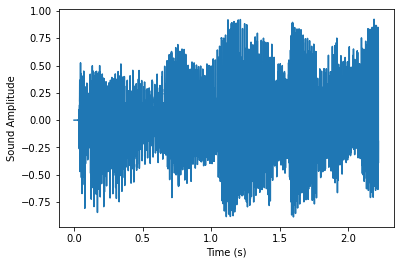

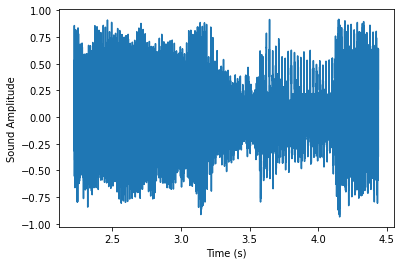

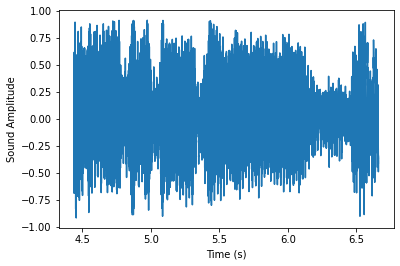

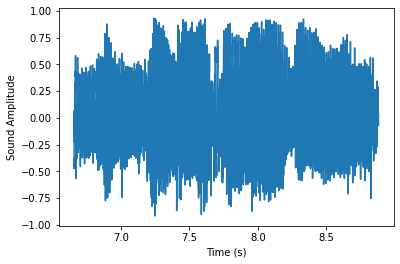

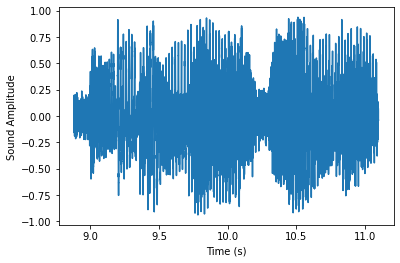

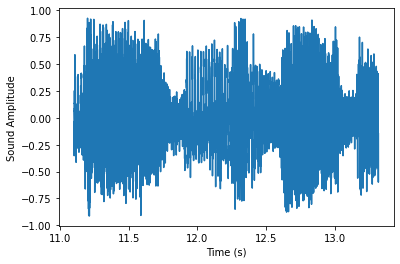

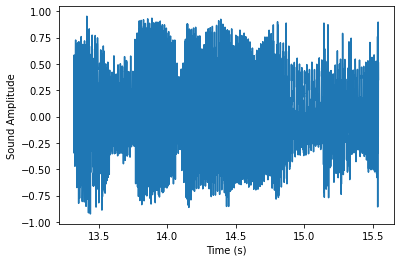

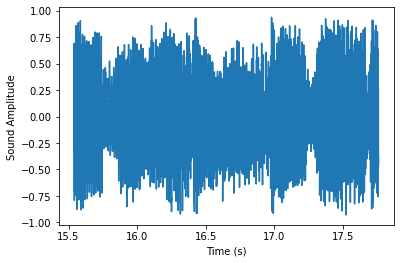

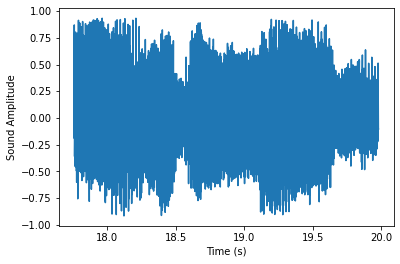

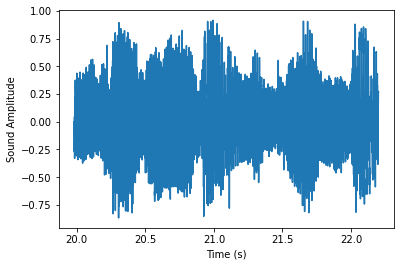

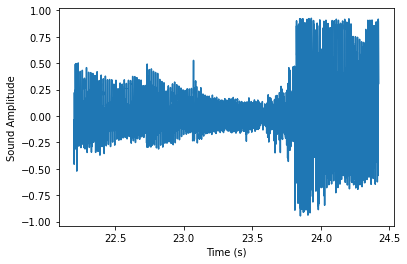

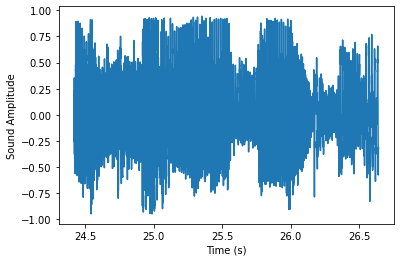

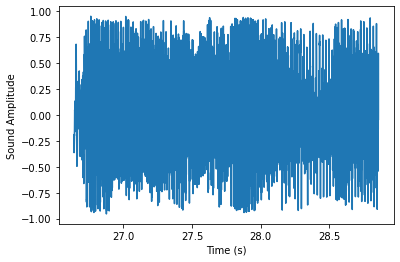

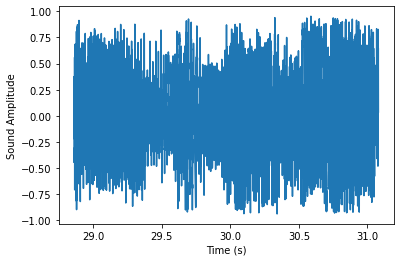

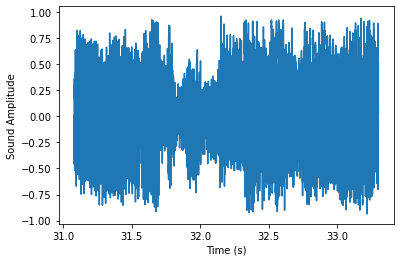

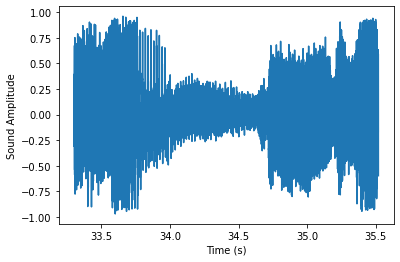

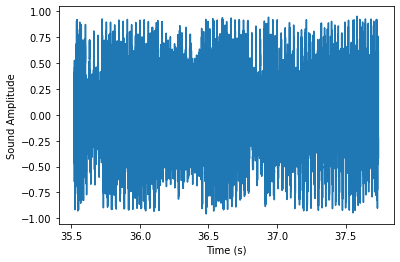

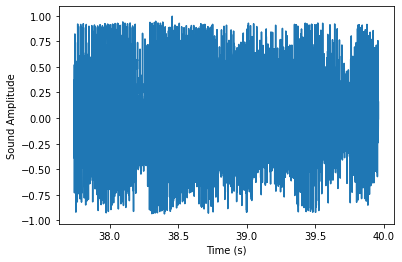

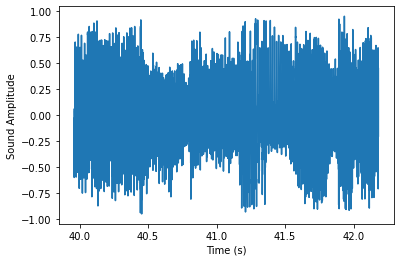

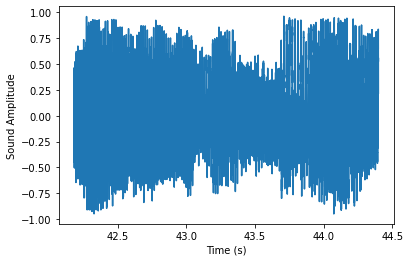

ASCII Values: 
[90 50 50 51 52 48 53 52 54 48 88 52 57 56 54 51 66 65 53 57]
AUDIO ID :  Z223405460X49863BA59


In [12]:
audio_id_generation('TestData\\Rahogi Meri - Love Aaj Kal 128 Kbps (mp3cut.net).wav')

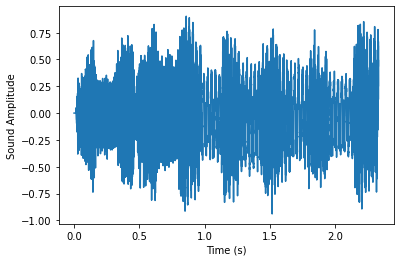

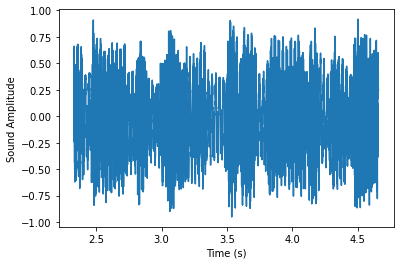

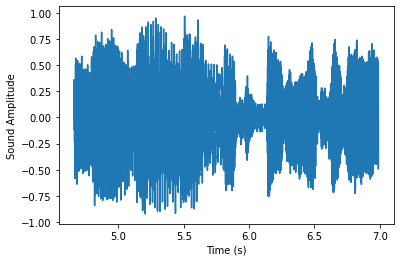

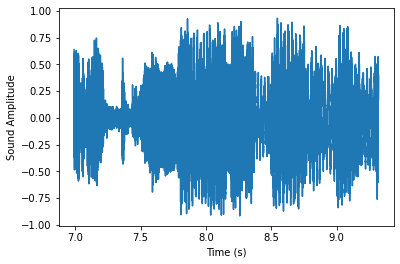

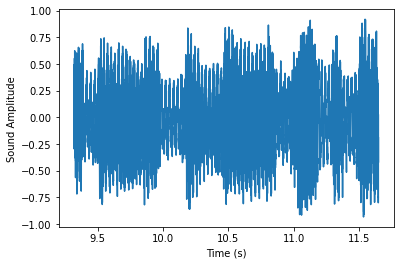

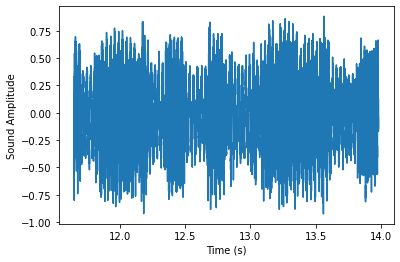

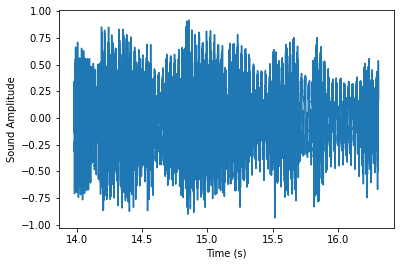

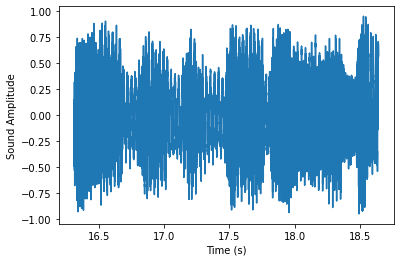

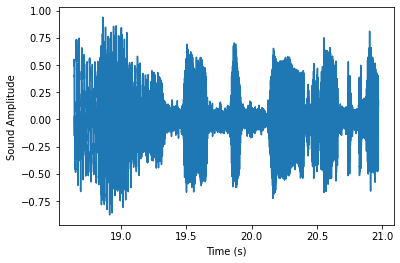

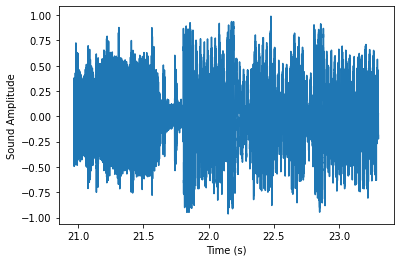

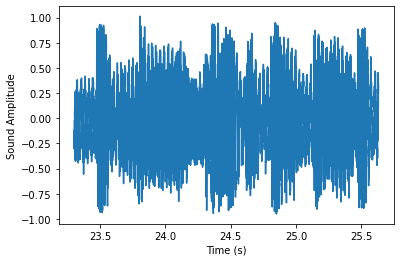

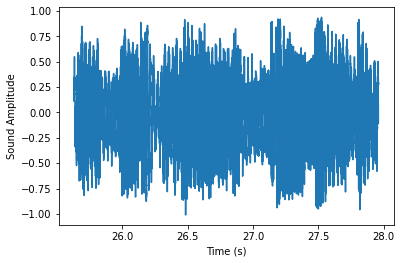

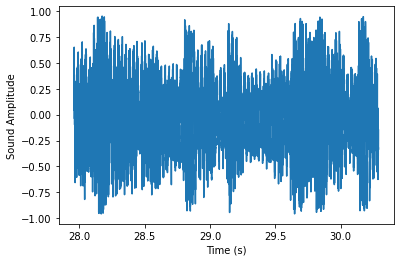

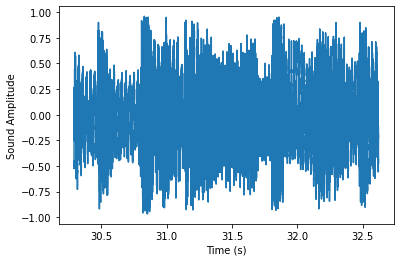

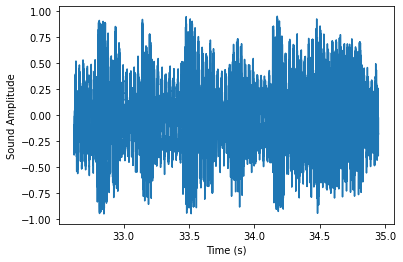

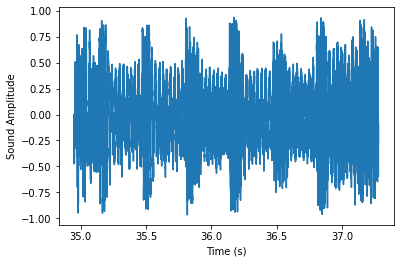

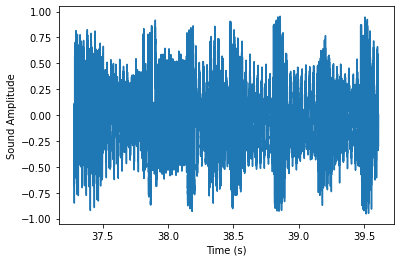

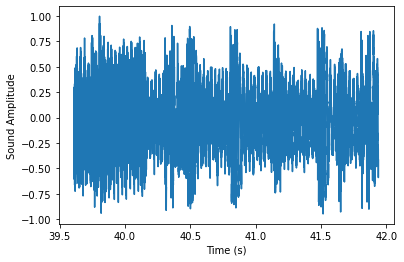

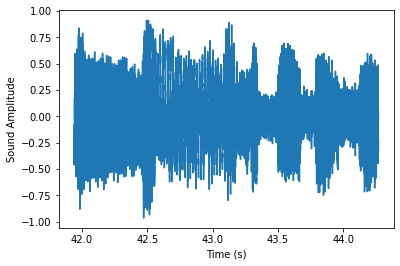

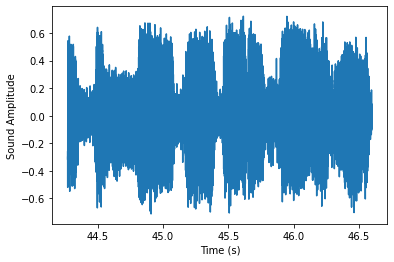

ASCII Values: 
[49 51 49 49 50 50 50 53 87 52 54 53 54 54 52 54 53 53 90 86]
AUDIO ID :  13112225W465664655ZV


In [13]:
audio_id_generation('TestData\\Sarkar-Jaura-Phagwara_001 (mp3cut.net).wav')

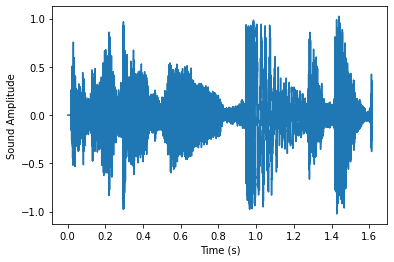

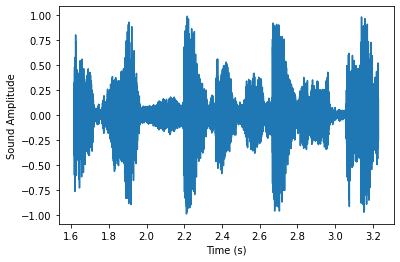

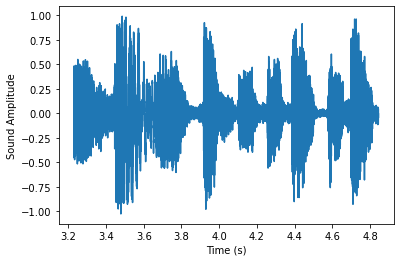

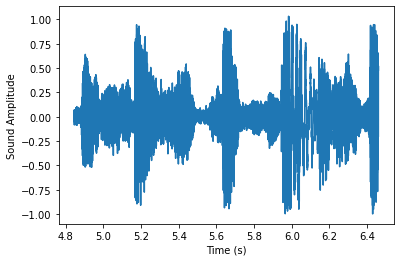

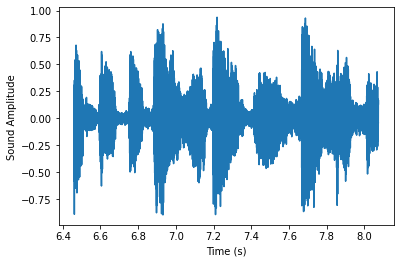

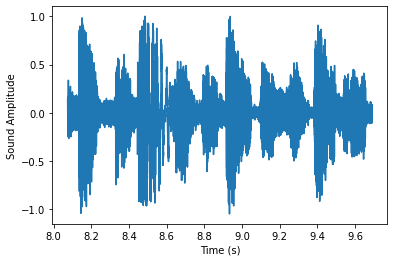

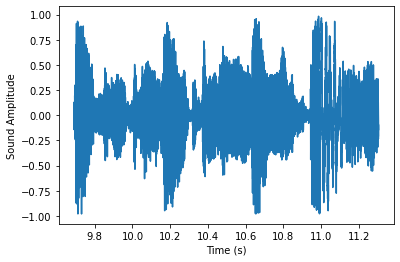

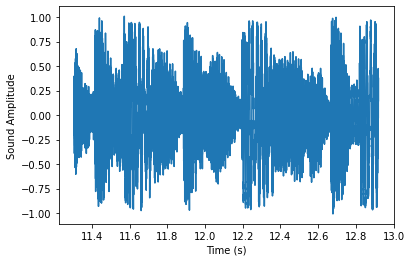

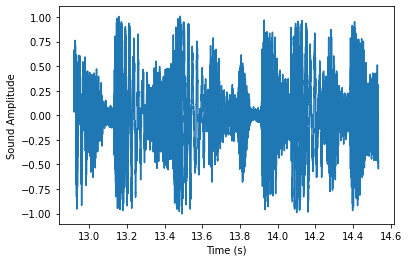

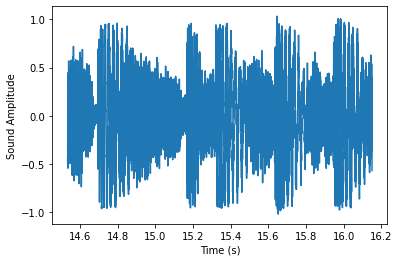

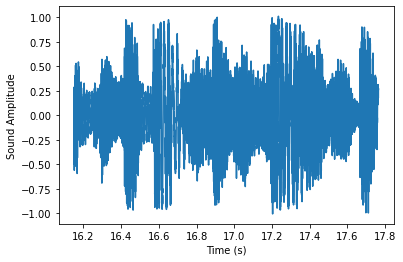

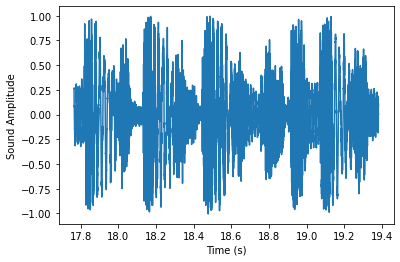

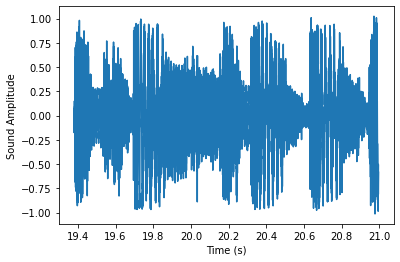

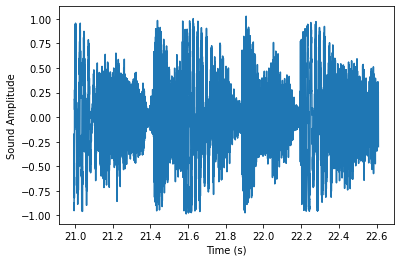

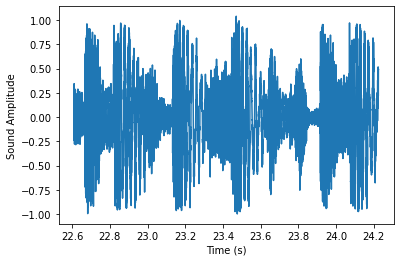

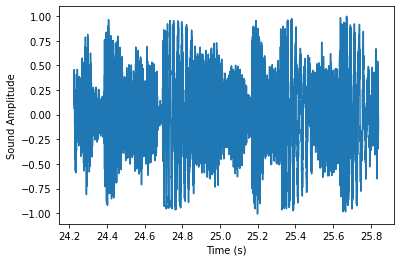

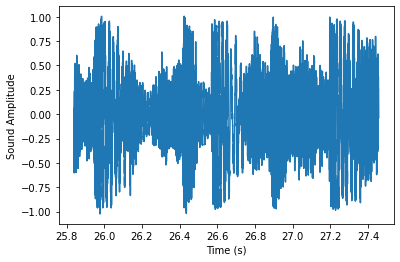

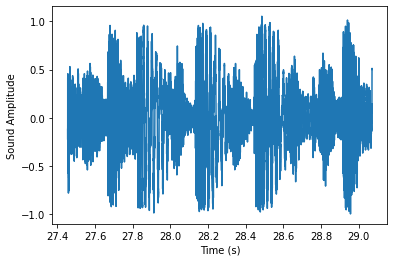

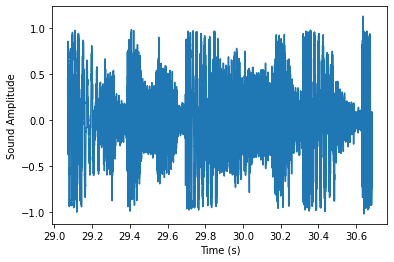

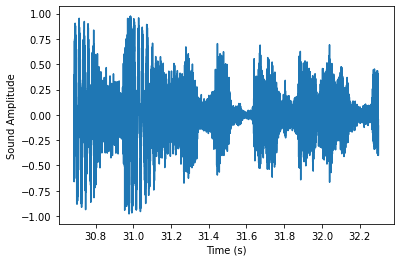

ASCII Values: 
[88 83 86 87 82 87 89 54 54 57 52 55 55 54 56 55 55 53 56 88]
AUDIO ID :  XSVWRWY669477687758X


In [14]:
audio_id_generation('TestData\\Taki Taki Ft Selena Gomez - DJ Snake (DJJOhAL (mp3cut.net).wav')